In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from numpy import asarray
from numpy import zeros
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/MSc Project/Data/USABLE/dataset1+3.csv")

In [4]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \r\nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \r\nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the Hous

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


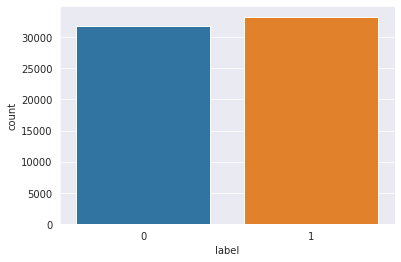

In [5]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df.label)

In [6]:
X = df['text'].to_list()
y = df['label'].to_list()

**PRE-PROCESSING OF DATA**

REMOVING URLs

In [10]:
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [11]:
X_url = [remove_url(x) for x in X]

LOWERCASING

In [12]:
X_lower = [x.lower() for x in X_url]

In [13]:
X_lower[:5]

['house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it by darrell lucus on october 30, 2016 subscribe jason chaffetz on the stump in american fork, utah ( image courtesy michael jolley, available under a creative commons-by license) \r\nwith apologies to keith olbermann, there is no doubt who the worst person in the world is this week–fbi director james comey. but according to a house democratic aide, it looks like we also know who the second-worst person is as well. it turns out that when comey sent his now-infamous letter announcing that the fbi was looking into emails that may be related to hillary clinton’s email server, the ranking democrats on the relevant committees didn’t hear about it from comey. they found out via a tweet from one of the republican committee chairmen. \r\nas we now know, comey notified the republican chairmen and democratic ranking members of the hou

REMOVING ALL NON-ALPHABETS

In [14]:
def cleandata(s):
    replaced = re.sub("[^a-zA-Z' ]+", '', s)
    return replaced

In [15]:
X_re = [cleandata(x) for x in X_lower]

In [16]:
len(X_re[0])

4857

STOPWORD REMOVAL

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stop = set(stopwords.words('english'))

In [20]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [21]:
X_stop = [remove_stopwords(x) for x in X_re]

In [22]:
len(X_stop[0])

3388

In [23]:
df = pd.DataFrame(list(zip(X_stop, y)),
               columns =['text', 'label'])

In [24]:
df.to_csv(r'/content/drive/MyDrive/MSc Project/Data/USABLE/dataset1+3_preprocessed.csv')